In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.getcwd()  # This will show your current working directory
#os.chdir('path_to_least_squares_folder')  # Change to the directory where helpers.py is located
os.chdir('/content/drive/My Drive/Colab Notebooks/Localization')

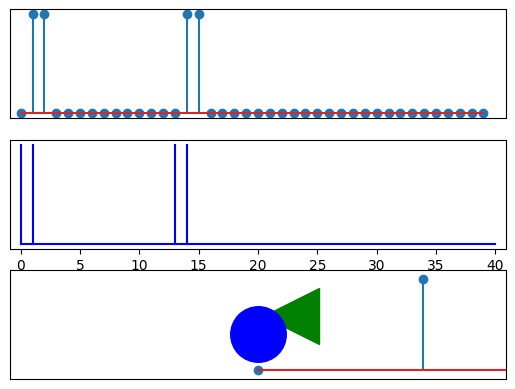

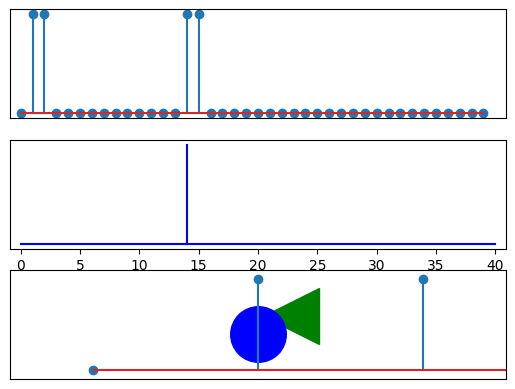

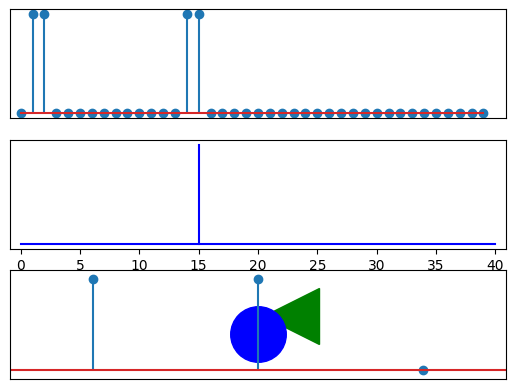

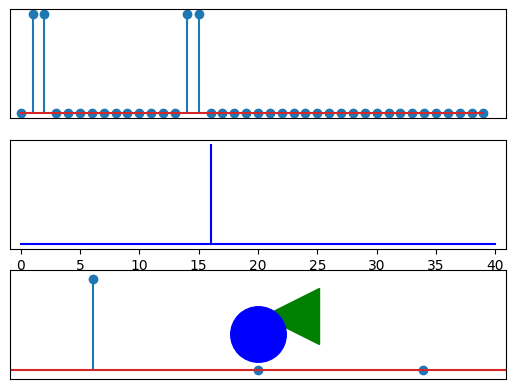

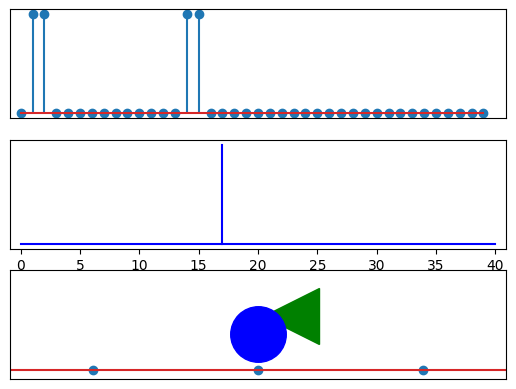

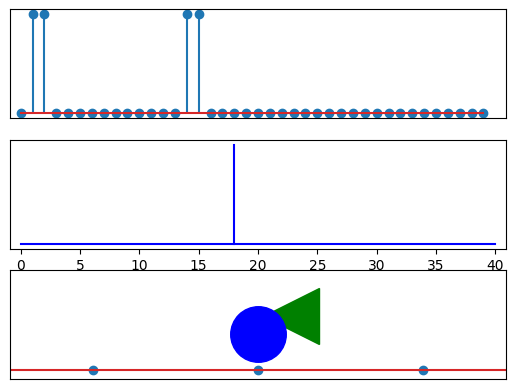

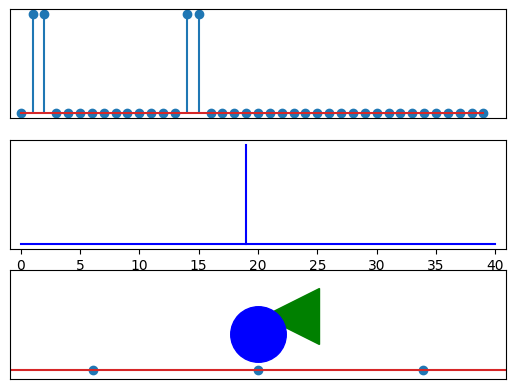

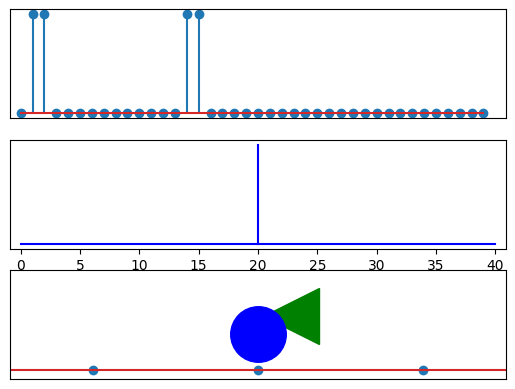

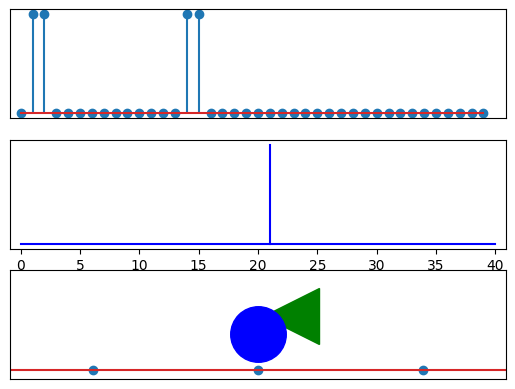

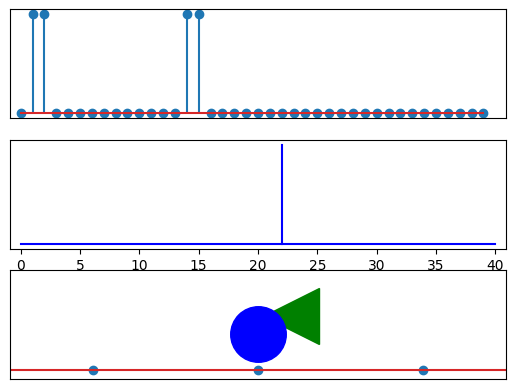

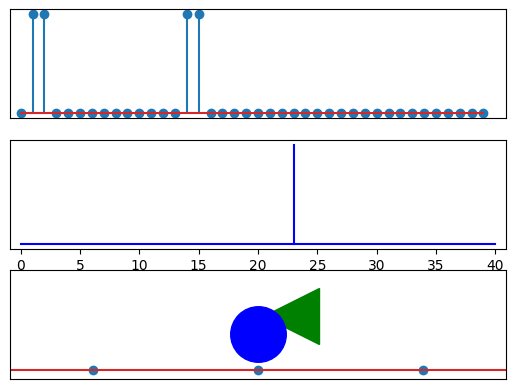

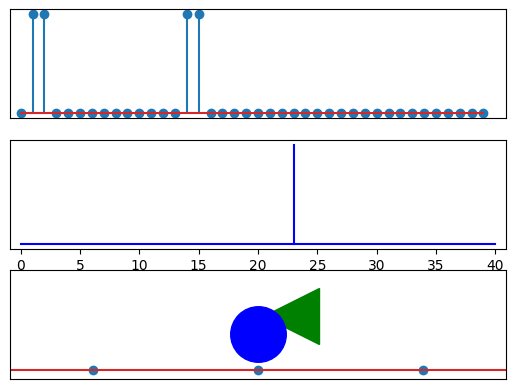

In [11]:
from sim.plot import plot
import numpy as np


class Robot:
    def __init__(self):
        self.loc = 0

    def move(self):
        self.loc += 1

    def detect_pole(self, poles):
        if self.loc + 1 in poles:
            return True
        else:
            return False


def bayes(PBA, PA, PB):
    PAB = PBA * PA / PB
    return PAB


def shift_priors(P_loc_i):
    for i in range(len(P_loc_i) - 1, 0, -1):
      P_loc_i[i] = P_loc_i[i - 1]
      P_loc_i[0] = 0


def update_loc_probability():
    for i in range(len(P_loc_i_prior)):
      if robot.detect_pole(poles):
        P_loc_i_posterior[i] = bayes(P_D_given_loc_i[i], P_loc_i_prior[i], P_D)
      else:
        P_loc_i_posterior[i] = bayes(P_not_D_given_loc_i[i], P_loc_i_prior[i], P_not_D)


distance = 40

robot = Robot()
robot.loc = 0
poles = [1, 2, 14, 15]

# P_loc_i_prior = P(Li) - Prior (before doing Bayes Rule) belief of being in location i.
# P_loc_i_posterior = P(Li|D) or P(Li|!D) - Updated belief of being in location i, after performing Bayes Rule.
# P_D = P(D) - Total Probability of Detecting a Pole.
# P_not_D = P(!D) - Total Probability of Not Detecting Pole.
# P_D_given_loc_i = P(D|Li) - Probability of detecting a pole, given we are in location i.
# P_not_D_given_loc_i = P(!D|Li) - Probability of not detecting a pole,
# given we are in location i.

# I'm initalizing variables (generally not done in python) so you can see what is a vector vs scalar.
# Setup bayes probabilities. Create as many probabilities or beliefs as
# there are discrete locations the robot can occupy.
P_loc_i_prior = np.zeros(distance)
P_loc_i_posterior = np.zeros(distance)
P_D = 0
P_not_D = 0
P_D_given_loc_i = np.zeros(distance)
P_not_D_given_loc_i = np.zeros(distance)

# Set the prior as if the robot hass equal probability to be in each location.
P_loc_i_prior += 1/distance
# Set probabilities of detecing a pole or not detecting a pole.
P_D = len(poles) / distance
P_not_D = 1 - P_D
# Set the probabilities for detecting (or not detecting) a pole for each
# location i.
for i in range(len(P_D_given_loc_i)):
  if i+1 in poles:
    P_D_given_loc_i[i] = 1.0
  else:
    P_D_given_loc_i[i] = 0.0
P_not_D_given_loc_i = 1 - P_D_given_loc_i


# Setup done, run first calculation of robots location.
update_loc_probability()
plot(distance, poles, P_loc_i_posterior, robot, block=True)

# Begin Moving
for j in range(10):
    robot.move()
    # Shift the priors to follow the robots movement.
    shift_priors(P_loc_i_posterior)
    # Set prior to previous posterior, so we can start the cycle over again.
    P_loc_i_prior = P_loc_i_posterior
    # Perform Bayes Rule using new information about whether the robot can
    # detect a pole.
    update_loc_probability()
    plot(distance, poles, P_loc_i_posterior, robot)

plot(distance, poles, P_loc_i_posterior, robot, block=True, pause_time=1)


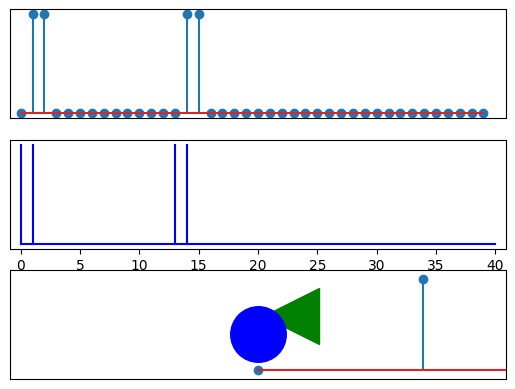

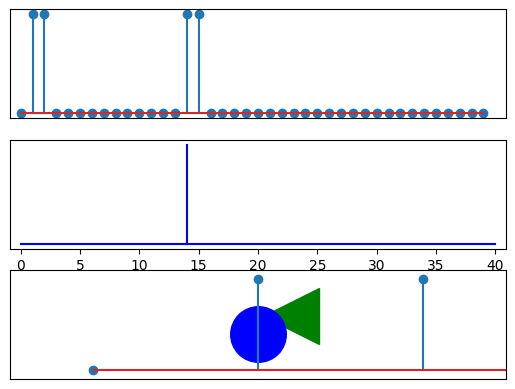

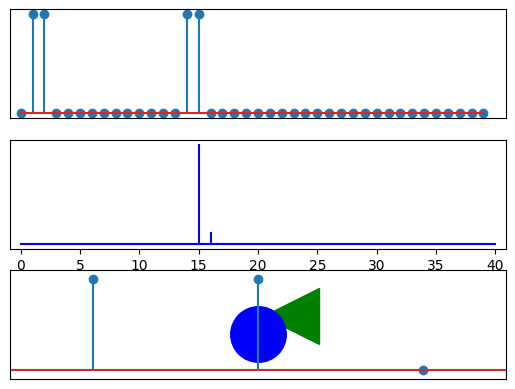

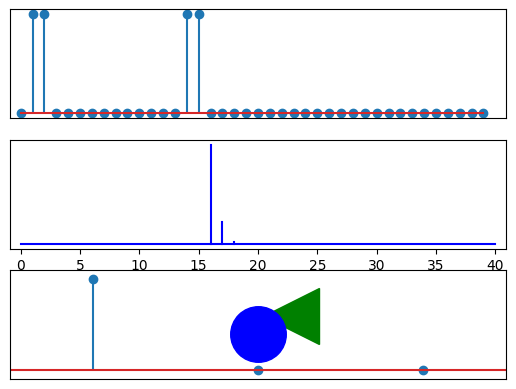

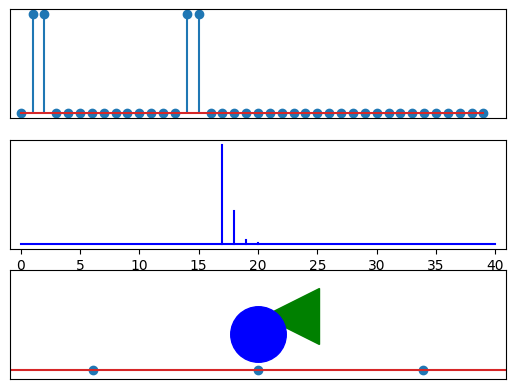

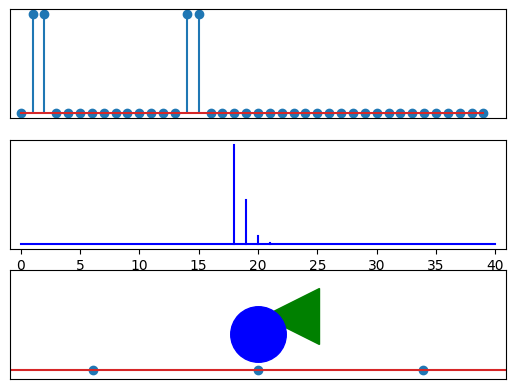

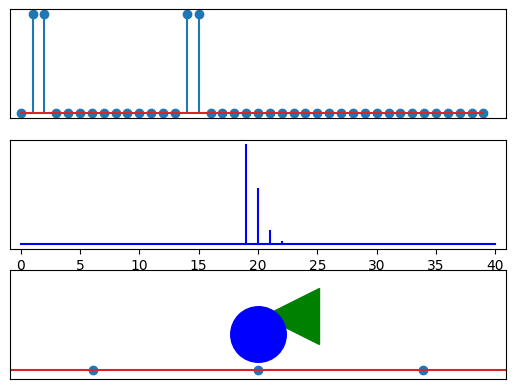

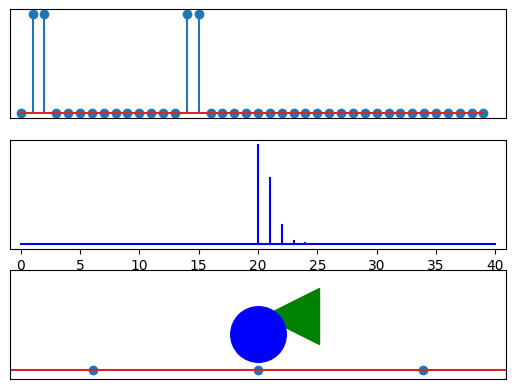

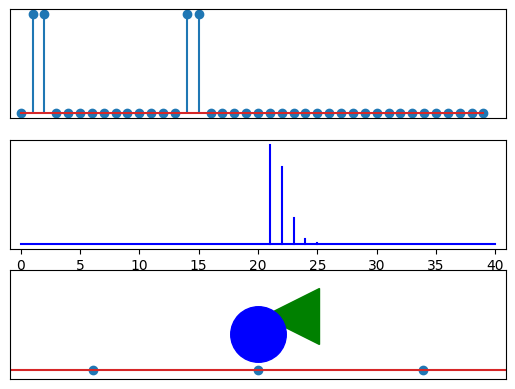

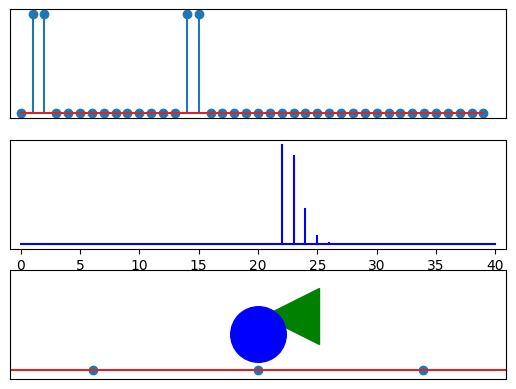

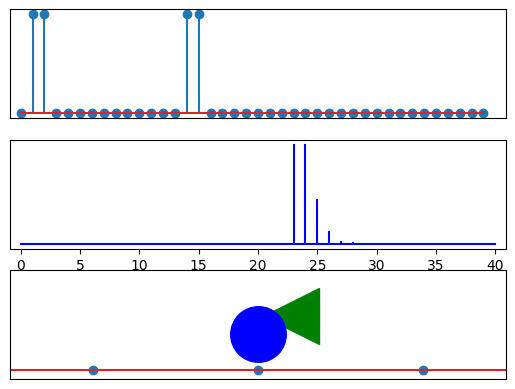

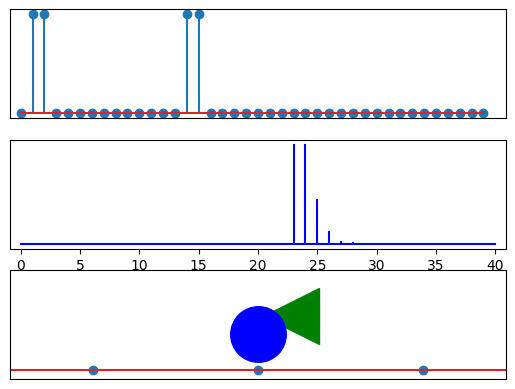

In [13]:
from sim.plot import plot
import numpy as np


class Robot:
    def __init__(self):
        self.loc = 0

    def move(self):
        self.loc += 1

    def detect_pole(self, poles):
        if self.loc + 1 in poles:
            return True
        else:
            return False


def bayes(PBA, PA, PB):
    PAB = PBA * PA / PB
    return PAB


def shift_priors(P_loc_i):
    for i in range(len(P_loc_i) - 1, 1, -1):
      P_loc_i[i] = P_loc_i[i - 1] * 0.9 + P_loc_i[i-2] * 0.1
    P_loc_i[1] = 0
    P_loc_i[0] = 0


def update_loc_probability():
    for i in range(len(P_loc_i_prior)):
      if robot.detect_pole(poles):
        P_loc_i_posterior[i] = bayes(P_D_given_loc_i[i], P_loc_i_prior[i], P_D)
      else:
        P_loc_i_posterior[i] = bayes(P_not_D_given_loc_i[i], P_loc_i_prior[i], P_not_D)


distance = 40

robot = Robot()
robot.loc = 0
poles = [1, 2, 14, 15]

# P_loc_i_prior = P(Li) - Prior (before doing Bayes Rule) belief of being in location i.
# P_loc_i_posterior = P(Li|D) or P(Li|!D) - Updated belief of being in location i, after performing Bayes Rule.
# P_D = P(D) - Total Probability of Detecting a Pole.
# P_not_D = P(!D) - Total Probability of Not Detecting Pole.
# P_D_given_loc_i = P(D|Li) - Probability of detecting a pole, given we are in location i.
# P_not_D_given_loc_i = P(!D|Li) - Probability of not detecting a pole,
# given we are in location i.

# I'm initalizing variables (generally not done in python) so you can see what is a vector vs scalar.
# Setup bayes probabilities. Create as many probabilities or beliefs as
# there are discrete locations the robot can occupy.
P_loc_i_prior = np.zeros(distance)
P_loc_i_posterior = np.zeros(distance)
P_D = 0
P_not_D = 0
P_D_given_loc_i = np.zeros(distance)
P_not_D_given_loc_i = np.zeros(distance)

# Set the prior as if the robot hass equal probability to be in each location.
P_loc_i_prior += 1/distance
# Set probabilities of detecing a pole or not detecting a pole.
P_D = len(poles) / distance
P_not_D = 1 - P_D
# Set the probabilities for detecting (or not detecting) a pole for each
# location i.
for i in range(len(P_D_given_loc_i)):
  if i+1 in poles:
    P_D_given_loc_i[i] = 1.0
  else:
    P_D_given_loc_i[i] = 0.0
P_not_D_given_loc_i = 1 - P_D_given_loc_i


# Setup done, run first calculation of robots location.
update_loc_probability()
plot(distance, poles, P_loc_i_posterior, robot, block=True)

# Begin Moving
for j in range(10):
    robot.move()
    # Shift the priors to follow the robots movement.
    shift_priors(P_loc_i_posterior)
    # Set prior to previous posterior, so we can start the cycle over again.
    P_loc_i_prior = P_loc_i_posterior
    # Perform Bayes Rule using new information about whether the robot can
    # detect a pole.
    update_loc_probability()
    plot(distance, poles, P_loc_i_posterior, robot)

plot(distance, poles, P_loc_i_posterior, robot, block=True, pause_time=1)
